In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
import numpy as np
import vice
import sys
sys.path.append("..")
from src.utils import subsample_stellar_populations, get_velocity_profile, oh_to_12pluslog
from src.plots.utils import weighted_median
load_style_sheet("papers")
print(sys.version_info)

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


In [39]:
# noburst = vice.output("../outputs/expifr/amd_betaphiin0p8")
# burst = vice.output("../outputs/expifr_gse/massratio3-tacc3p2-gsechem")
# burst_zpoor = vice.output("../outputs/expifr_gse/massratio3-tacc3p2-metalpoorgse")
# burst_zpoor_expsigma = vice.output("../outputs/expifr_gse/massratio3-tacc3p2-metalpoorgse-expsigma")


# noburst = vice.output("../outputs/expifr/amd_betaphiin0p8-sigmacrit1e6")
# burst = vice.output("../outputs/expifr_gse/amd_betaphiin0p8-sigmacrit1e6-massratio3")
# burst_radial = vice.output("../outputs/expifr_gse/amd_betaphiin0p8-sigmacrit1e6-massratio3-gsebetaphiin0")
# burst_retro = vice.output("../outputs/expifr_gse/amd_betaphiin0p8-sigmacrit1e6-massratio3-gsebetaphiin-1")
# burst_retro_metalpoorgse = vice.output("../outputs/expifr_gse/amd_betaphiin0p8-sigmacrit1e6-massratio3-gsebetaphiin-1-metalpoor")
# burst_retro_metalpoorgse_highmass = vice.output("../outputs/expifr_gse/amd_betaphiin0p8-sigmacrit1e6-massratio1-gsebetaphiin-1-metalpoor")

# smooth = vice.output("../outputs/expifr/amd_betaphiin0p8-sigmacrit1e6")
# diskcollapse = vice.output("../outputs/expifr/amd_betaphiin0p8-diskcollapsetest")
# # diskcollapse_gse = vice.output("../outputs/expifr_gse/amd_betaphiin0p8-diskcollapse-gse5p2Gyr-massive-zpoor")
# # diskcollapse_gse = vice.output("../outputs/expifr_gse/amd_betaphiin0p8-diskcollapse-gse5p2Gyr-massive")
# diskcollapse_gse = vice.output("../outputs/expifr_gse/amd_betaphiin0p8-diskcollapse-gse7p2Gyr-massive-zpoor")
# diskcollapse_gse_prograde = vice.output("../outputs/expifr_gse/amd_betaphiin0p8-diskcollapse-gse7p2Gyr-massive-zpoor-prograde")
# output = vice.output("../outputs/expifr/amd/betaphiin0p8")

output = vice.output("../outputs/expifr/amd-pwd/base")
comp = vice.output("../outputs/expifr_gse/amd-pwd/tacc3p2/massratio3/expsigma/gsebetaphiin-0p8")
comp2 = vice.output("../outputs/expifr_gse/amd-pwd/tacc3p2/massratio3/expsigma/gsebetaphiin-0p2")
amd = vice.output("../outputs/expifr_gse/amd/tacc3p2/massratio3/expsigma/gsebetaphiin-0p8")

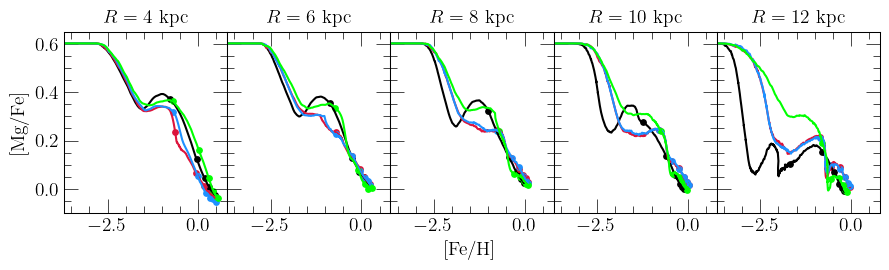

In [40]:
RADII = [4, 6, 8, 10, 12]

fig = plt.figure(figsize = (9, 2.8))
axes = []
for i in range(5):
    axes.append(fig.add_subplot(151 + i))
    axes[i].set_xlim([-3.7, 0.8])
    axes[i].set_ylim([-0.1, 0.65])
    axes[i].set_title(r"$R = %d$ kpc" % (RADII[i]))
    if i: plt.setp(axes[i].get_yticklabels(), visible = False)
    # axes[i].set_xticks([-2, -1, 0])
axes[2].set_xlabel(r"[Fe/H]")
axes[0].set_ylabel(r"[Mg/Fe]")

def plot_track(ax, output, radius, marklookbacks = [], zone_width = 0.1, **kwargs):
    zone = int(radius / zone_width)
    zone = output.zones["zone%d" % (zone)]
    ax.plot(zone.history["[fe/h]"], zone.history["[mg/fe]"], **kwargs)
    for i in range(len(marklookbacks)):
        diff = [abs(_ - marklookbacks[i]) for _ in zone.history["lookback"]]
        idx = diff.index(min(diff))
        _kwargs = {}
        if "c" in kwargs.keys(): _kwargs["color"] = kwargs["c"]
        _kwargs["marker"] = markers()["circle"]
        _kwargs["s"] = 15
        ax.scatter(zone.history["[fe/h]"][idx], zone.history["[mg/fe]"][idx], **_kwargs)
    
for i in range(len(RADII)):
    plot_track(axes[i], output, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["black"])
    plot_track(axes[i], comp, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["crimson"])
    plot_track(axes[i], comp2, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["dodgerblue"])
    plot_track(axes[i], amd, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["lime"])
    # plot_track(axes[i], smooth, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["black"])
    # plot_track(axes[i], diskcollapse, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["crimson"])
    # plot_track(axes[i], diskcollapse_gse, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["dodgerblue"])
    # plot_track(axes[i], diskcollapse_gse_prograde, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["lime"])
    # plot_track(axes[i], noburst, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["black"], label = "No Burst")
    # plot_track(axes[i], burst, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["crimson"], label = "Burst")
    # plot_track(axes[i], burst_radial, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10],
    #     c = named_colors()["dodgerblue"], label = "Burst (Radial)")
    # plot_track(axes[i], burst_retro, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10],
    #     c = named_colors()["lime"], label = "Burst (Retrograde)")
    # plot_track(axes[i], burst_retro_metalpoorgse, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10],
    #     c = named_colors()["crimson"], label = "Burst (Retrograde \& Metal-Poor)")
    # plot_track(axes[i], burst_retro_metalpoorgse_highmass, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10],
    #     c = named_colors()["gold"], label = "Burst (Retrograde \& Metal-Poor)")
    # plot_track(axes[i], burst, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10], c = named_colors()["crimson"], label = "Burst")
    # plot_track(axes[i], burst_zpoor, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10],
    #     c = named_colors()["dodgerblue"], label = "Burst (Z-poor GSE)")
    # plot_track(axes[i], burst_zpoor, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10],
    #     c = named_colors()["dodgerblue"], label = "Burst (Z-poor GSE)")
    # plot_track(axes[i], burst_zpoor_expsigma, RADII[i], marklookbacks = [0, 2, 4, 6, 8, 10],
    #     c = named_colors()["lime"], label = "Burst (Z-poor GSE)")

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
plt.show()

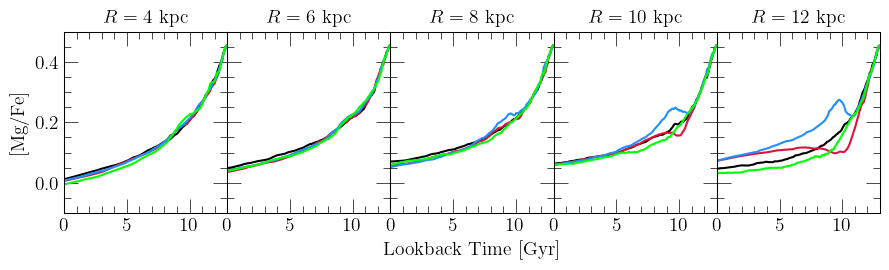

In [17]:
RADII = [4, 6, 8, 10, 12]

fig = plt.figure(figsize = (9, 2.8))
axes = []
for i in range(5):
    axes.append(fig.add_subplot(151 + i))
    axes[i].set_xlim([0.0, 13])
    axes[i].set_ylim([-0.1, 0.5])
    axes[i].set_title(r"$R = %d$ kpc" % (RADII[i]))
    if i: plt.setp(axes[i].get_yticklabels(), visible = False)
    # axes[i].set_xscale("log")
    axes[i].set_xticks([0, 5, 10])
axes[2].set_xlabel(r"Lookback Time [Gyr]")
axes[0].set_ylabel(r"[Mg/Fe]")

def plot_evol(ax, output, radius, zone_width = 0.1, **kwargs):
    zone = int(radius / zone_width)
    zone = output.zones["zone%d" % (zone)]
    ax.plot(zone.history["lookback"], zone.history["[mg/fe]"], **kwargs)

for i in range(len(RADII)):
    plot_evol(axes[i], noburst, RADII[i], c = named_colors()["black"], label = "No Burst")
    plot_evol(axes[i], burst, RADII[i], c = named_colors()["crimson"], label = "Burst")
    plot_evol(axes[i], burst_zpoor, RADII[i], c = named_colors()["dodgerblue"], label = "Burst")
    plot_evol(axes[i], burst_zpoor_expsigma, RADII[i], c = named_colors()["lime"], label = "Burst")

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
plt.show()

In [34]:
# name = "../outputs/expifr/amd_betaphiin0p8"
# name = "../outputs/expifr_gse/massratio3-tacc3p2-gsechem"
# name = "../outputs/expifr_gse/massratio3-tacc3p2-metalpoorgse"
# name = "../outputs/expifr_gse/massratio3-tacc3p2-metalpoorgse-expsigma"
# name = "../outputs/expifr/amd_betaphiin0p8-sigmacrit1e6"
# name = "../outputs/expifr_gse/amd_betaphiin0p8-sigmacrit1e6-massratio3"
# name = "../outputs/expifr_gse/amd_betaphiin0p8-sigmacrit1e6-massratio3-gsebetaphiin0"
# name = "../outputs/expifr_gse/amd_betaphiin0p8-sigmacrit1e6-massratio3-gsebetaphiin-1"
# name = "../outputs/expifr_gse/amd_betaphiin0p8-sigmacrit1e6-massratio3-gsebetaphiin-1-metalpoor"
# name = "../outputs/expifr_gse/amd_betaphiin0p8-sigmacrit1e6-massratio1-gsebetaphiin-1-metalpoor"
# name = "../outputs/expifr/amd_betaphiin0p8-diskcollapsetest"
# name = "../outputs/expifr_gse/amd_betaphiin0p8-diskcollapse-gse5p2Gyr-massive-zpoor"
# name = "../outputs/expifr_gse/amd_betaphiin0p8-diskcollapse-gse7p2Gyr-massive"
# name = "../outputs/expifr_gse/amd_betaphiin0p8-diskcollapse-gse7p2Gyr-massive-zpoor"
# name = "../outputs/expifr_gse/amd_betaphiin0p8-diskcollapse-gse7p2Gyr-massive-zpoor-prograde"


# name = "../outputs/expifr/amd-pwd/base"
name = "../outputs/expifr_gse/amd-pwd/tacc3p2/massratio3/expsigma/gsebetaphiin-0p2"
output = vice.output(name)
extra = np.genfromtxt("%s_analogdata.out" % (output.name))
output.stars["absz"] = [abs(_) for _ in extra[:,-1][:output.stars.size[0]]]

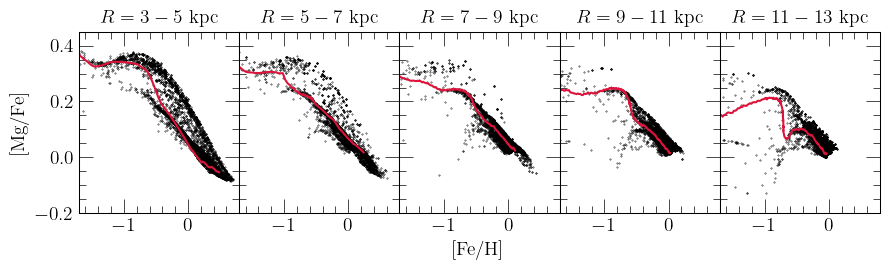

In [35]:
RADIAL_BINS = [[3, 5], [5, 7], [7, 9], [9, 11], [11, 13]]

fig = plt.figure(figsize = (9, 2.8))
axes = []
for i in range(5):
    axes.append(fig.add_subplot(151 + i))
    axes[i].set_xlim([-1.7, 0.8])
    axes[i].set_ylim([-0.2, 0.45])
    axes[i].set_title(r"$R = %d - %d$ kpc" % (RADIAL_BINS[i][0], RADIAL_BINS[i][1]))
    if i: plt.setp(axes[i].get_yticklabels(), visible = False)
    # axes[i].set_xticks([-2, -1, 0])
axes[2].set_xlabel(r"[Fe/H]")
axes[0].set_ylabel(r"[Mg/Fe]")

def plot_stars(ax, output, rmin, rmax, abszmin, abszmax, zone_width = 0.1, N = 5000, seed = 0, **kwargs):
    stars = output.stars.filter(
        "zone_final", ">=", int(rmin / zone_width)).filter(
        "zone_final", "<=", int(rmax / zone_width) - 1).filter(
        "absz", ">=", abszmin).filter(
        "absz", "<=", abszmax).filter(
        "mass", ">=", 1)
    stars = subsample_stellar_populations(stars, N = N, seed = seed)
    ax.scatter(stars["[fe/h]"], stars["[mg/fe]"], **kwargs)

def plot_track(ax, output, radius, zone_width = 0.1, **kwargs):
    zone = int(radius / zone_width)
    zone = output.zones["zone%d" % (zone)]
    ax.plot(zone.history["[fe/h]"], zone.history["[mg/fe]"], **kwargs)

for i in range(len(RADIAL_BINS)):
# for i in [0]:
    kwargs = {
        "color": named_colors()["black"],
        "s": 0.1,
        "rasterized": True
    }
    plot_stars(axes[i], output, RADIAL_BINS[i][0], RADIAL_BINS[i][1], 0, 0.5, **kwargs)
    kwargs = {"c": named_colors()["crimson"]}
    plot_track(axes[i], output, sum(RADIAL_BINS[i]) / 2, **kwargs)
    

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    # plt.savefig("./afe-feh/basemodel-scatterplot.%s" % (ext), **kwargs)
    # plt.savefig("./afe-feh/tacc3p2-prograde-scatterplot.%s" % (ext), **kwargs)
    # plt.savefig("./afe-feh/tacc3p2-radial-scatterplot.%s" % (ext), **kwargs)
    # plt.savefig("./afe-feh/tacc9p2-retrograde-scatterplot.%s" % (ext), **kwargs)
plt.show()

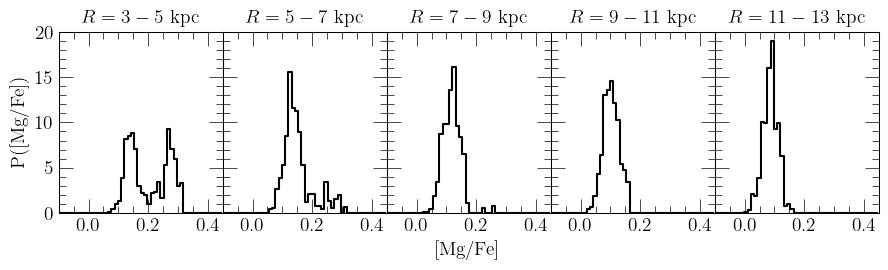

In [36]:
RADIAL_BINS = [[3, 5], [5, 7], [7, 9], [9, 11], [11, 13]]

fig = plt.figure(figsize = (9, 2.8))
axes = []
for i in range(5):
    axes.append(fig.add_subplot(151 + i))
    axes[i].set_xlim([-0.1, 0.45])
    axes[i].set_ylim([0, 20])
    axes[i].set_title(r"$R = %d - %d$ kpc" % (RADIAL_BINS[i][0], RADIAL_BINS[i][1]))
    if i: plt.setp(axes[i].get_yticklabels(), visible = False)
    # axes[i].set_xticks([-2, -1, 0])
    axes[i].set_xticks([0, 0.2, 0.4])
axes[2].set_xlabel(r"[Mg/Fe]")
axes[0].set_ylabel(r"P([Mg/Fe])")

def plot_distribution(ax, output, rmin, rmax, abszmin, abszmax, fehmin, fehmax, zone_width = 0.1, **kwargs):
    stars = output.stars.filter(
        "zone_final", ">=", int(rmin / zone_width)).filter(
        "zone_final", "<=", int(rmax / zone_width) - 1).filter(
        "absz", ">=", abszmin).filter(
        "absz", "<=", abszmax).filter(
        "[fe/h]", ">=", fehmin).filter(
        "[fe/h]", "<=", fehmax).filter(
        "mass", ">=", 1)
    hist, bins = np.histogram(stars["[mg/fe]"], bins = 50, range = ax.get_xlim(),
        weights = stars["mass"], density = True)
    xvals = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
    ax.plot(xvals, hist, **kwargs)

for i in range(len(RADIAL_BINS)):
    kwargs = {
        "c": named_colors()["black"],
        "drawstyle": "steps-mid"
    }
    plot_distribution(axes[i], output, RADIAL_BINS[i][0], RADIAL_BINS[i][1], 0, 0.5, -0.4, -0.2, **kwargs)

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    # plt.savefig("./afe-feh/basemodel-afedists.%s" % (ext), **kwargs)
    # plt.savefig("./afe-feh/tacc3p2-prograde-afedists.%s" % (ext), **kwargs)
    # plt.savefig("./afe-feh/tacc3p2-radial-afedists.%s" % (ext), **kwargs)
    # plt.savefig("./afe-feh/tacc9p2-retrograde-afedists.%s" % (ext), **kwargs)
plt.show()